# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Human Resources


*   Nama: Alif Khusain Bilfaqih
*   Email: faqihkeren44@gmail.com
*   Id Dicoding:

## Data Preparing

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
print('Pandas version: ', pd.__version__)
print('Seaborn version: ', sns.__version__)
print('numpy version: ', np.__version__)

Pandas version:  2.0.3
Seaborn version:  0.13.1
numpy version:  1.25.2


In [3]:
url = 'https://raw.githubusercontent.com/faqihkeren44/Submission-Penerapan-Data-Science/main/employee_data.csv'
main_df = pd.read_csv(url, index_col=0)
main_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeId,,,,,,,,,,,,,,,,,,,,,
1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,4,...,2,80,1,7,2,3,6,2,1,2
2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,1,...,1,80,0,15,2,1,1,0,0,0
3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,1,...,3,80,3,18,2,4,10,0,2,7
4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,3,...,4,80,1,23,2,4,20,4,4,8
5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,3,...,2,80,3,20,2,3,5,3,0,2


In [4]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 1470
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1058 non-null   float64
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   int64  
 9   EnvironmentSatisfaction   1470 non-null   int64  
 10  Gender                    1470 non-null   object 
 11  HourlyRate                1470 non-null   int64  
 12  JobInvolvement            1470 non-null   int64  
 13  JobLevel                  1470 non-null   int64  
 14  JobRole      

In [5]:
main_df.isna().sum()

Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInC

In [6]:
main_df.dropna(inplace=True)

In [7]:
main_df.duplicated().sum()

0

In [8]:
attrition_df = main_df.drop(main_df[main_df.Attrition != 1.0].index)
attrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeId,,,,,,,,,,,,,,,,,,,,,
2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,1,...,1,80,0,15,2,1,1,0,0,0
3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,1,...,3,80,3,18,2,4,10,0,2,7
8,55,1.0,Travel_Rarely,725,Research & Development,2,3,Medical,1,4,...,4,80,1,24,2,3,5,2,1,4
12,20,1.0,Travel_Rarely,129,Research & Development,4,3,Technical Degree,1,1,...,2,80,0,1,2,3,1,0,0,0
25,24,1.0,Travel_Rarely,813,Research & Development,1,3,Medical,1,2,...,1,80,1,6,2,2,2,0,2,0


In [9]:
nonattrition_df = main_df.drop(main_df[main_df.Attrition != 0.0].index)
nonattrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeId,,,,,,,,,,,,,,,,,,,,,
4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,3,...,4,80,1,23,2,4,20,4,4,8
7,40,0.0,Travel_Rarely,1124,Sales,1,2,Medical,1,2,...,3,80,3,6,2,2,4,3,0,2
9,36,0.0,Travel_Frequently,635,Research & Development,18,1,Medical,1,2,...,1,80,0,8,2,3,8,1,1,7
10,32,0.0,Travel_Rarely,1018,Research & Development,3,2,Life Sciences,1,3,...,4,80,0,10,6,3,7,7,7,7
11,25,0.0,Travel_Rarely,583,Sales,4,1,Marketing,1,3,...,1,80,0,5,1,4,5,2,0,3


## Data Understanding

In [10]:
columns=main_df.columns
for i in columns:
  uniqueValues=main_df[i].nunique()
  print(i, uniqueValues)

Age 43
Attrition 2
BusinessTravel 3
DailyRate 731
Department 3
DistanceFromHome 29
Education 5
EducationField 6
EmployeeCount 1
EnvironmentSatisfaction 4
Gender 2
HourlyRate 71
JobInvolvement 4
JobLevel 5
JobRole 9
JobSatisfaction 4
MaritalStatus 3
MonthlyIncome 991
MonthlyRate 1038
NumCompaniesWorked 10
Over18 1
OverTime 2
PercentSalaryHike 15
PerformanceRating 2
RelationshipSatisfaction 4
StandardHours 1
StockOptionLevel 4
TotalWorkingYears 40
TrainingTimesLastYear 7
WorkLifeBalance 4
YearsAtCompany 35
YearsInCurrentRole 19
YearsSinceLastPromotion 16
YearsWithCurrManager 18


In [11]:
main_df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'],
             inplace=True, axis=1)

### Numerical

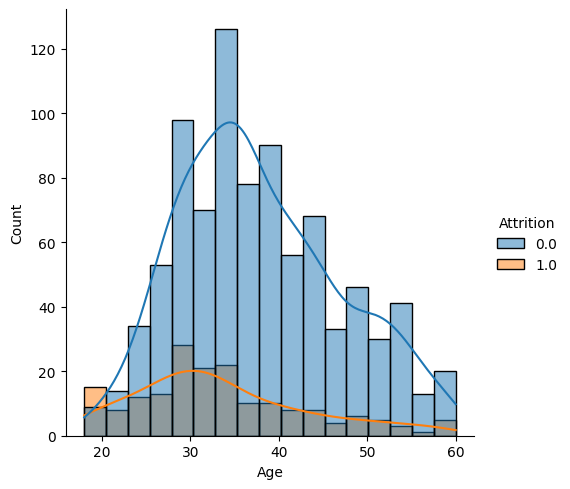

In [12]:
sns.displot(main_df, x="Age", hue="Attrition", kde=True)

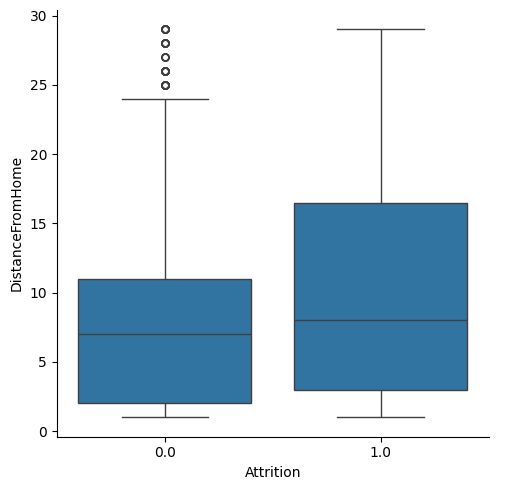

In [13]:
sns.catplot(data=main_df, x="Attrition", y="DistanceFromHome", kind="box")

<ipython-input-14-1e85cfa2da0c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Numeric['Attrition'] = main_df['Attrition']


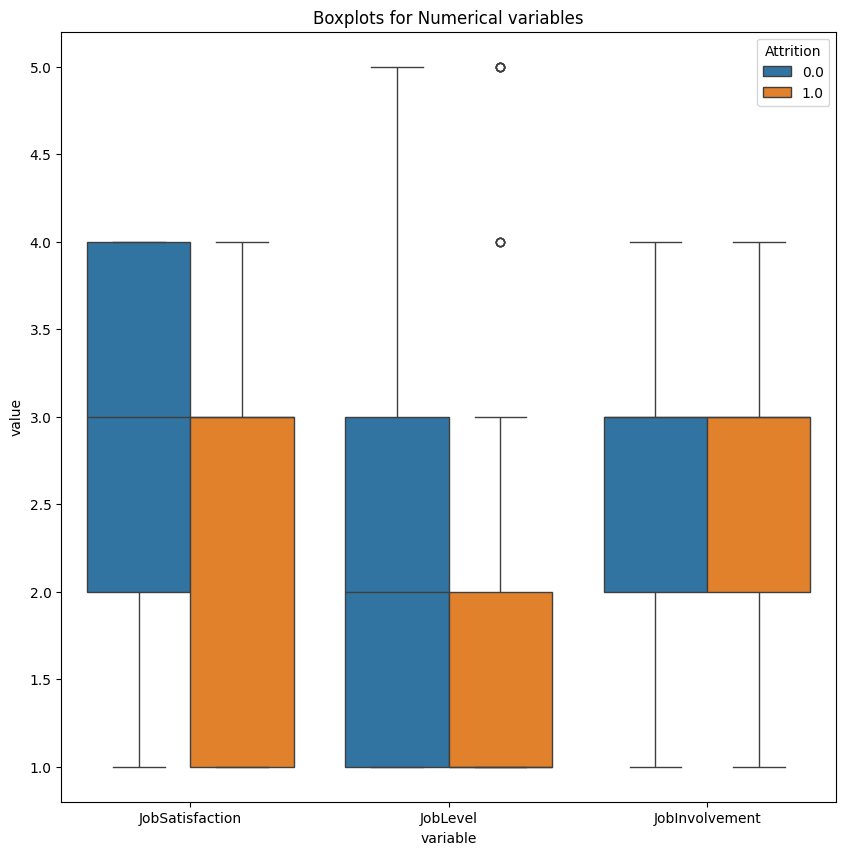

In [14]:
Numeric = main_df[['JobSatisfaction','JobLevel','JobInvolvement']]
Numeric['Attrition'] = main_df['Attrition']
NewNumeric = Numeric.melt(id_vars=['Attrition'])

plt.figure(figsize=(10,10))
plt.title("Boxplots for Numerical variables")
bp=sns.boxplot(x='variable',y='value',data=NewNumeric,hue='Attrition')
plt.show()

Beberapa grafik boxplot di atas dapat disimpulkan bahwa:
* Pekerja umur 20 kebawah lebih banyak melakukan *Attrition*, Sedangkan pekerja yang jarang melakukan *Attrition* berada dikisaran 30-40
* Jarak dari kantor ke rumah memiliki pengaruh terhadap *Attrition*
* Kebanyakan pekerja yang melakukan *Attrition* memiliki kepuasan kerja di bawah 3
* level pekerjaan di atas 3 tidak melakukan *Attrition*

In [15]:
main_df.loc[main_df["OverTime"] == "No", "OverTime"] = 0
main_df.loc[main_df["OverTime"] == "Yes", "OverTime"] = 1

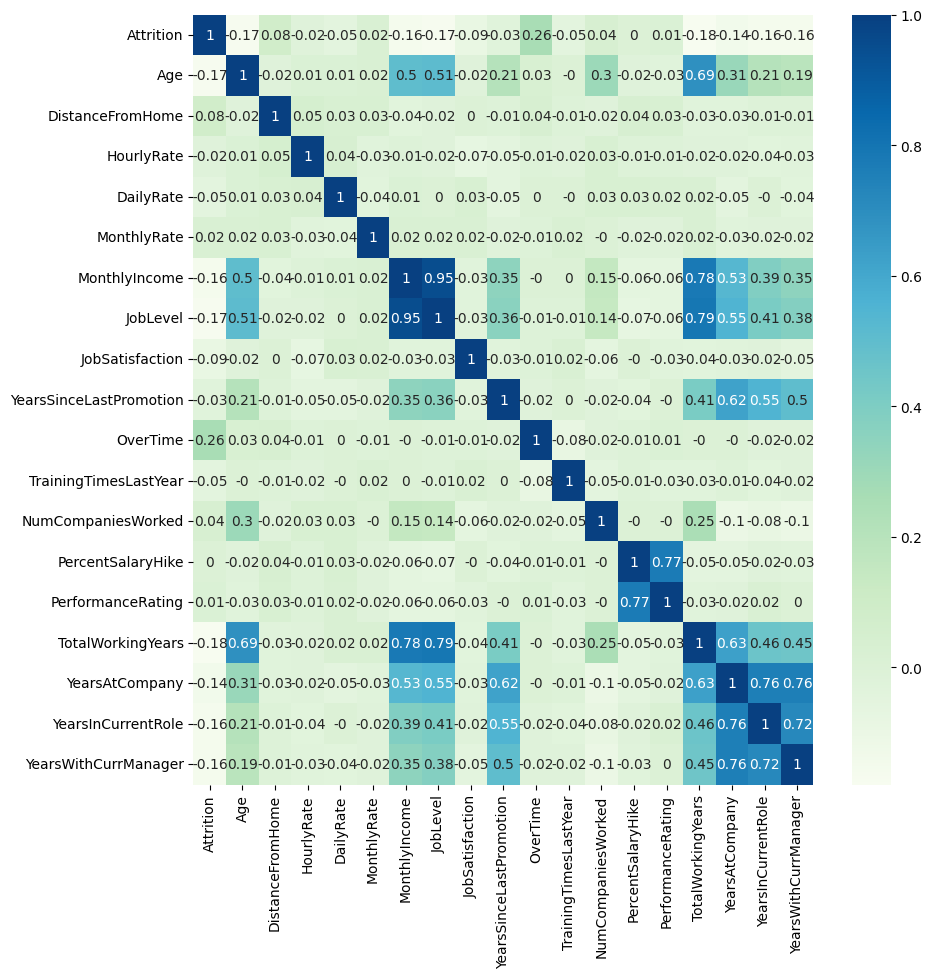

In [16]:
Numeric = main_df[['Attrition', 'Age','DistanceFromHome','HourlyRate','DailyRate','MonthlyRate',
                  'MonthlyIncome','JobLevel','JobSatisfaction','YearsSinceLastPromotion','OverTime',
                  'TrainingTimesLastYear','NumCompaniesWorked','PercentSalaryHike','PerformanceRating',
                  'TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager']]
plt.figure(figsize=(10,10))
sns.heatmap(round(Numeric.corr(),2),annot=True,mask=None,cmap='GnBu')
plt.show()

Dengan beberapa analisis numerik di atas, dapat diketahui bahwa:
* Dengan meningkatnya umur, pengalaman dalam bekerja juga bertambah, dan pendapatan setiap bulannya pun bertambah
* Semakin *TotalWorkingYears* bertambah (Semakin lama bekerja), akan dipromosikan mendapatkan level pekerjaan yang lebih tinggi, sehingga menghasilkan pendapatan yang lebih tinggi
* *YearsAtCompany, YearsWithCurrManager*, dan *YearsInCurrentRole* saling menunjukkan korelasi yang positif

### Kategorikal

<Axes: xlabel='BusinessTravel', ylabel='count'>

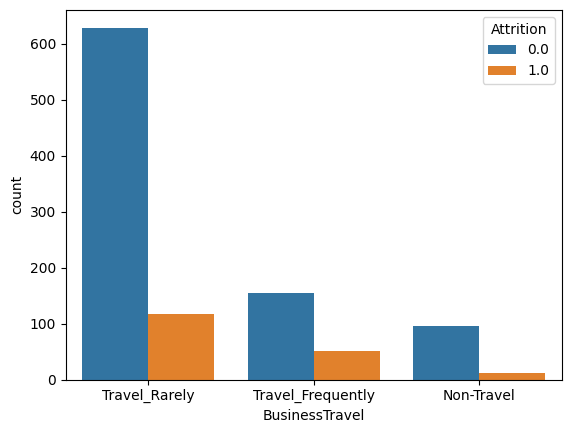

In [17]:
sns.countplot(data=main_df, x="BusinessTravel", hue="Attrition")

<Axes: xlabel='Department', ylabel='count'>

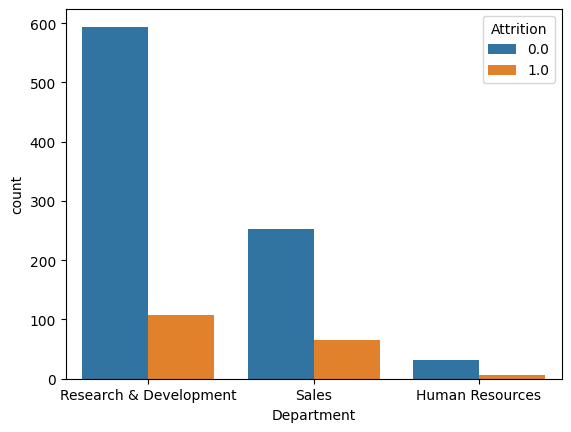

In [18]:
sns.countplot(main_df, x="Department", hue="Attrition")

<Axes: xlabel='count', ylabel='EducationField'>

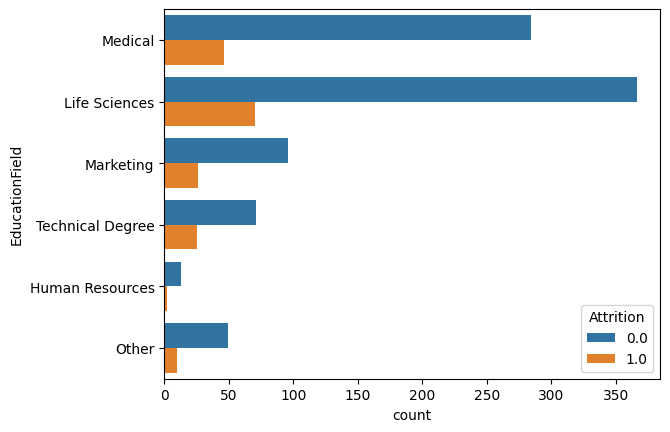

In [19]:
sns.countplot(data=main_df, y="EducationField", hue="Attrition")

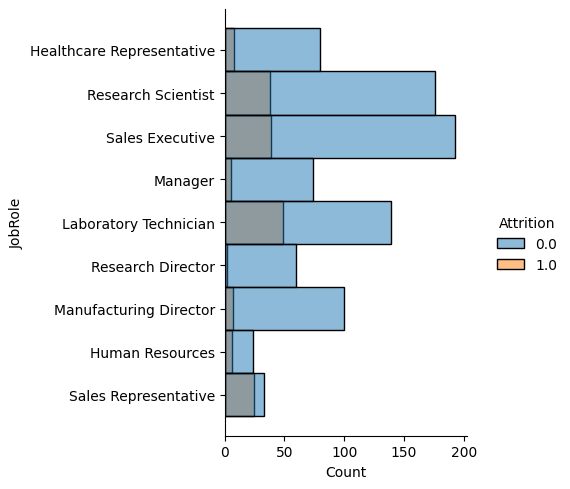

In [20]:
sns.displot(data=main_df, y="JobRole", hue="Attrition")

<Axes: xlabel='MaritalStatus', ylabel='count'>

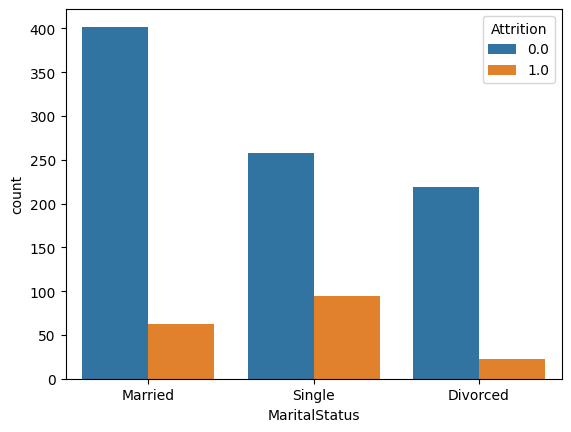

In [21]:
sns.countplot(data=main_df, x="MaritalStatus", hue="Attrition")

<Axes: xlabel='OverTime', ylabel='count'>

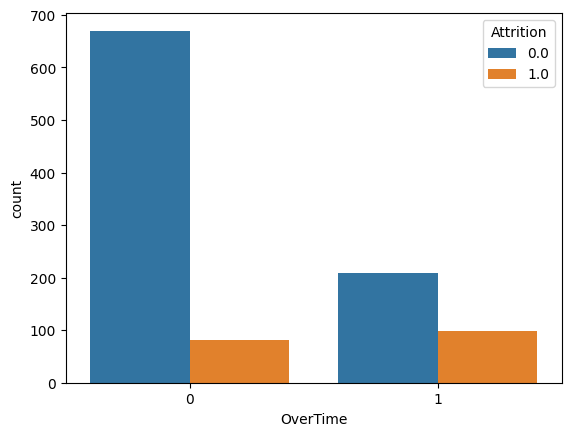

In [22]:
sns.countplot(data=main_df, x="OverTime", hue="Attrition")

Dari barchart data kategorikal di atas dapat disimpulkan bahwa:
* Data didominasi dari departemen *Research & Development*, sedangkan departemen *Human Resources* memilki jumlah paling sedikit
* Pekerjaan *Sales Representative* dan *Laboratory Technician* lebih banyak melakukan *Attrition*
* Orang dengan status cerai lebih sedikit *Attrition*
* Kerja lembur yang dilakukan pekerja menghasilkan banyaknya *Attrition*

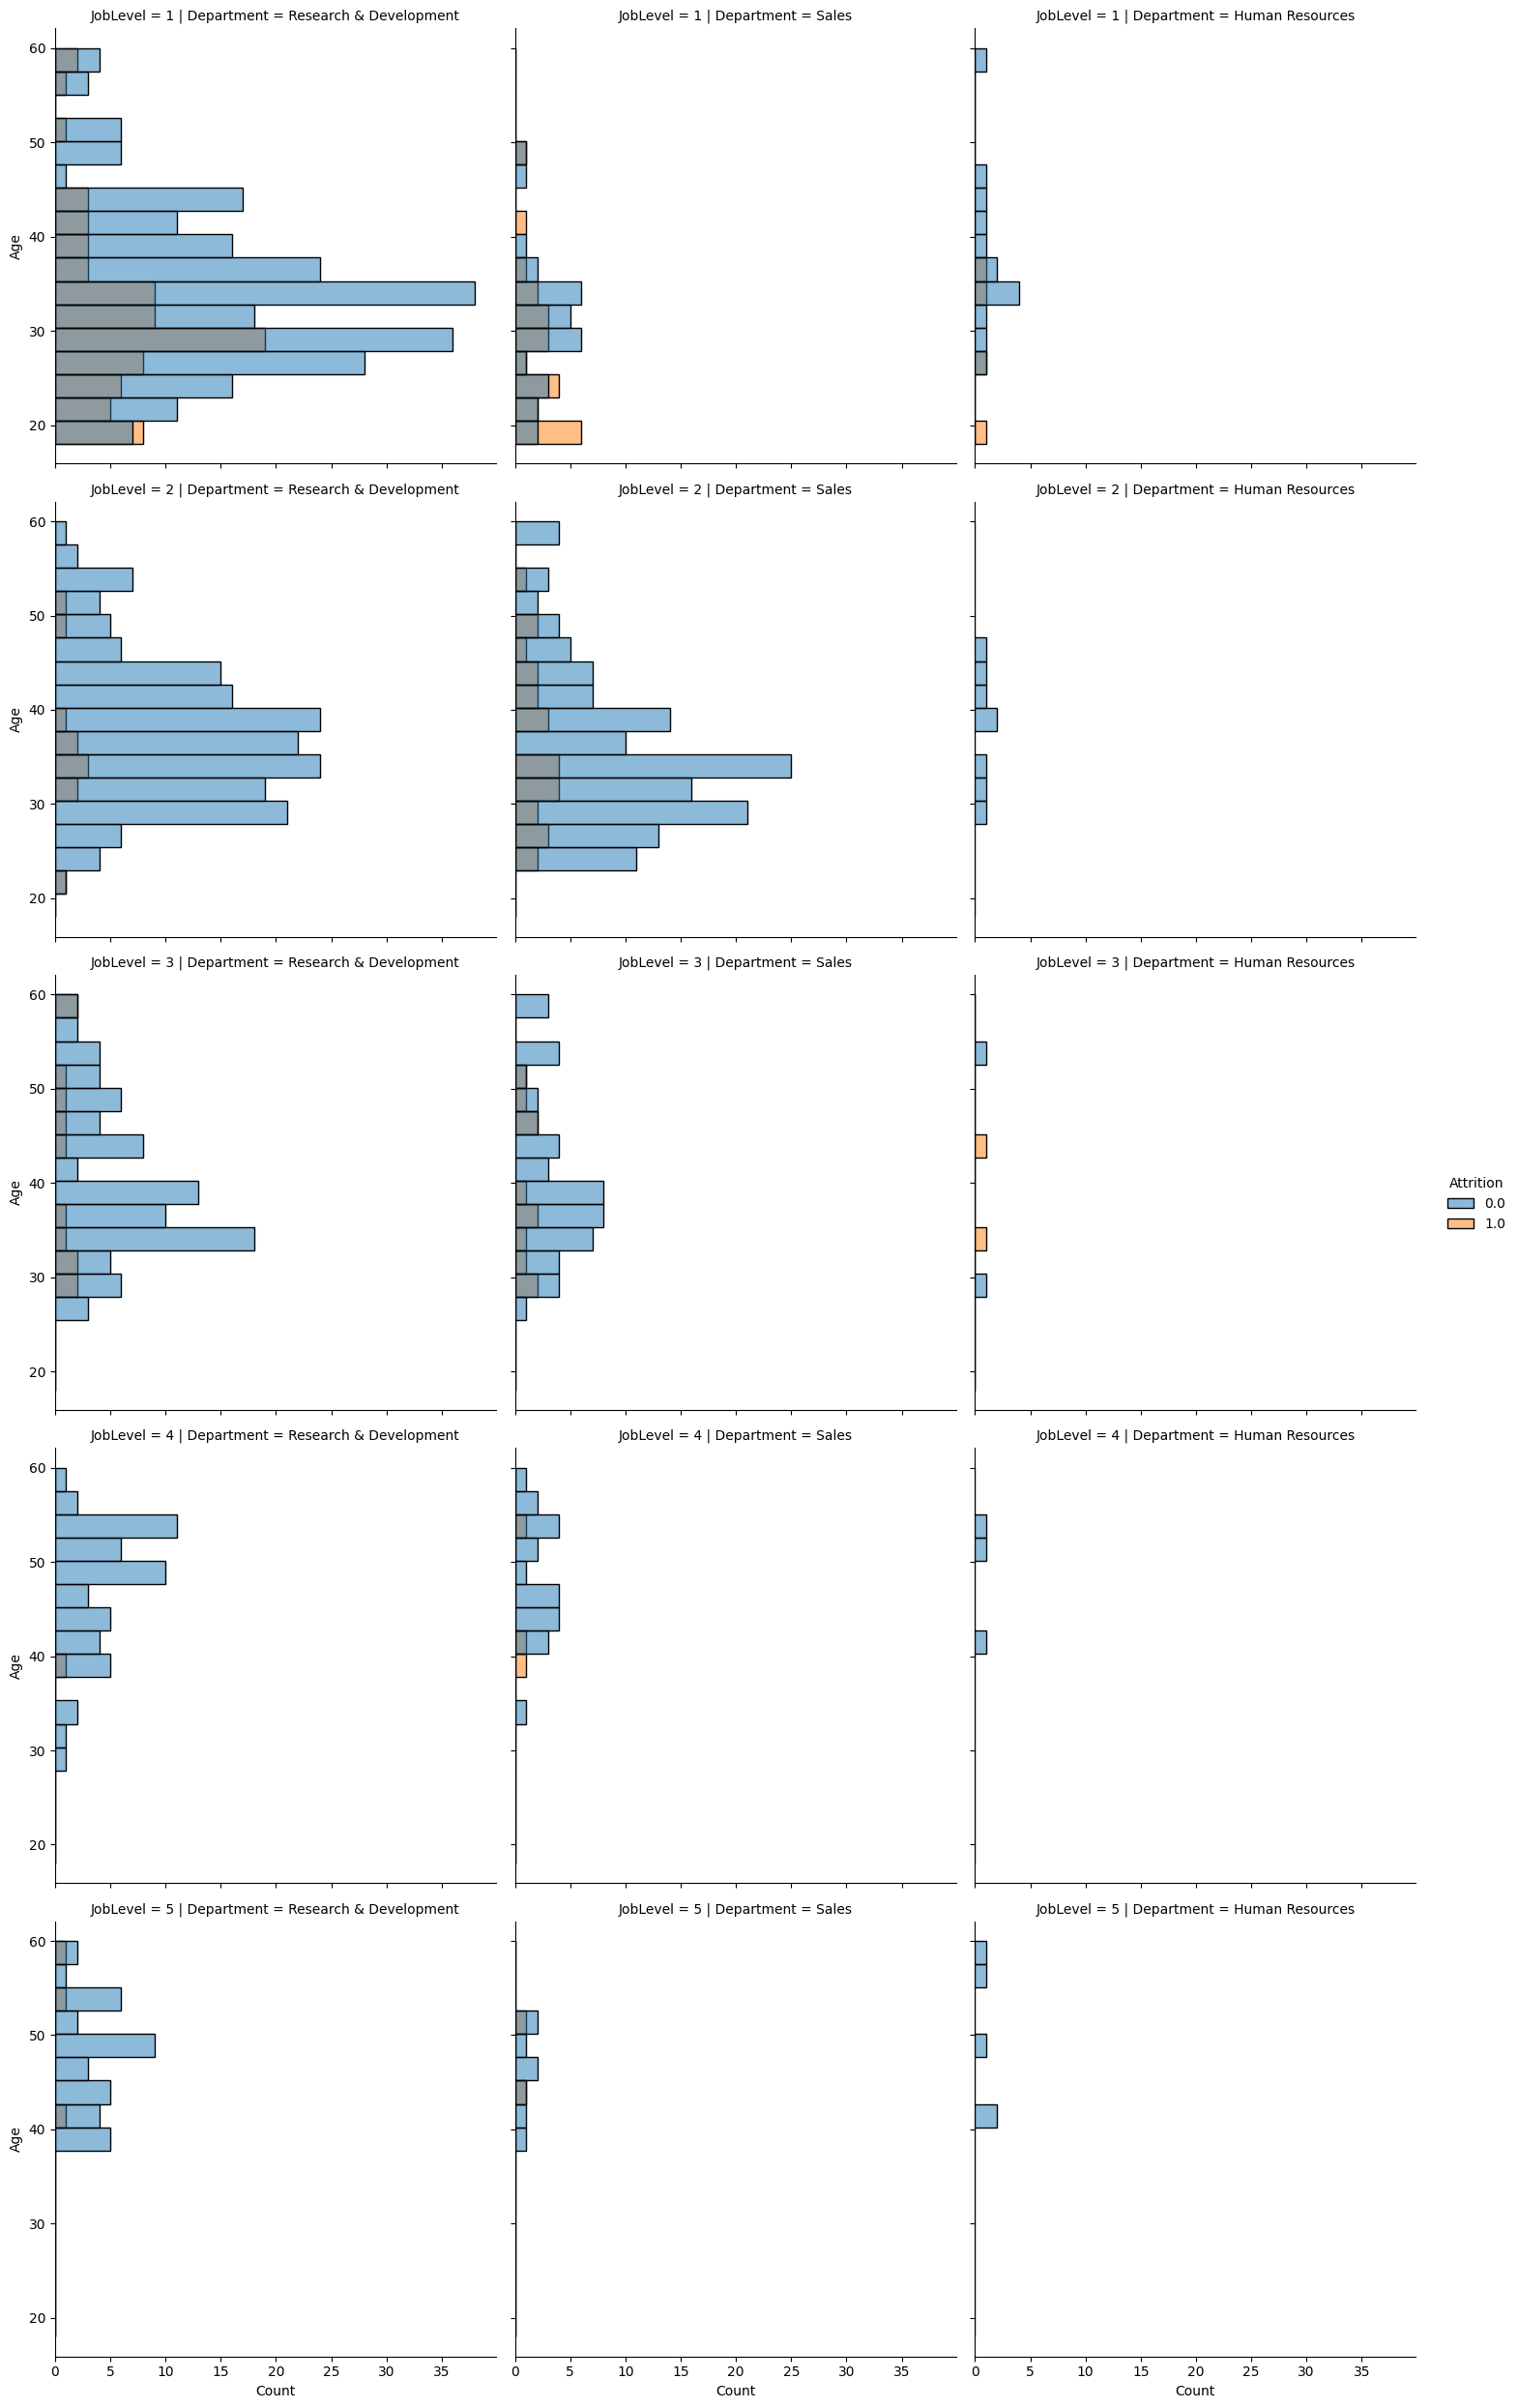

In [23]:
sns.displot(main_df, y="Age", hue="Attrition", col="Department", row="JobLevel")

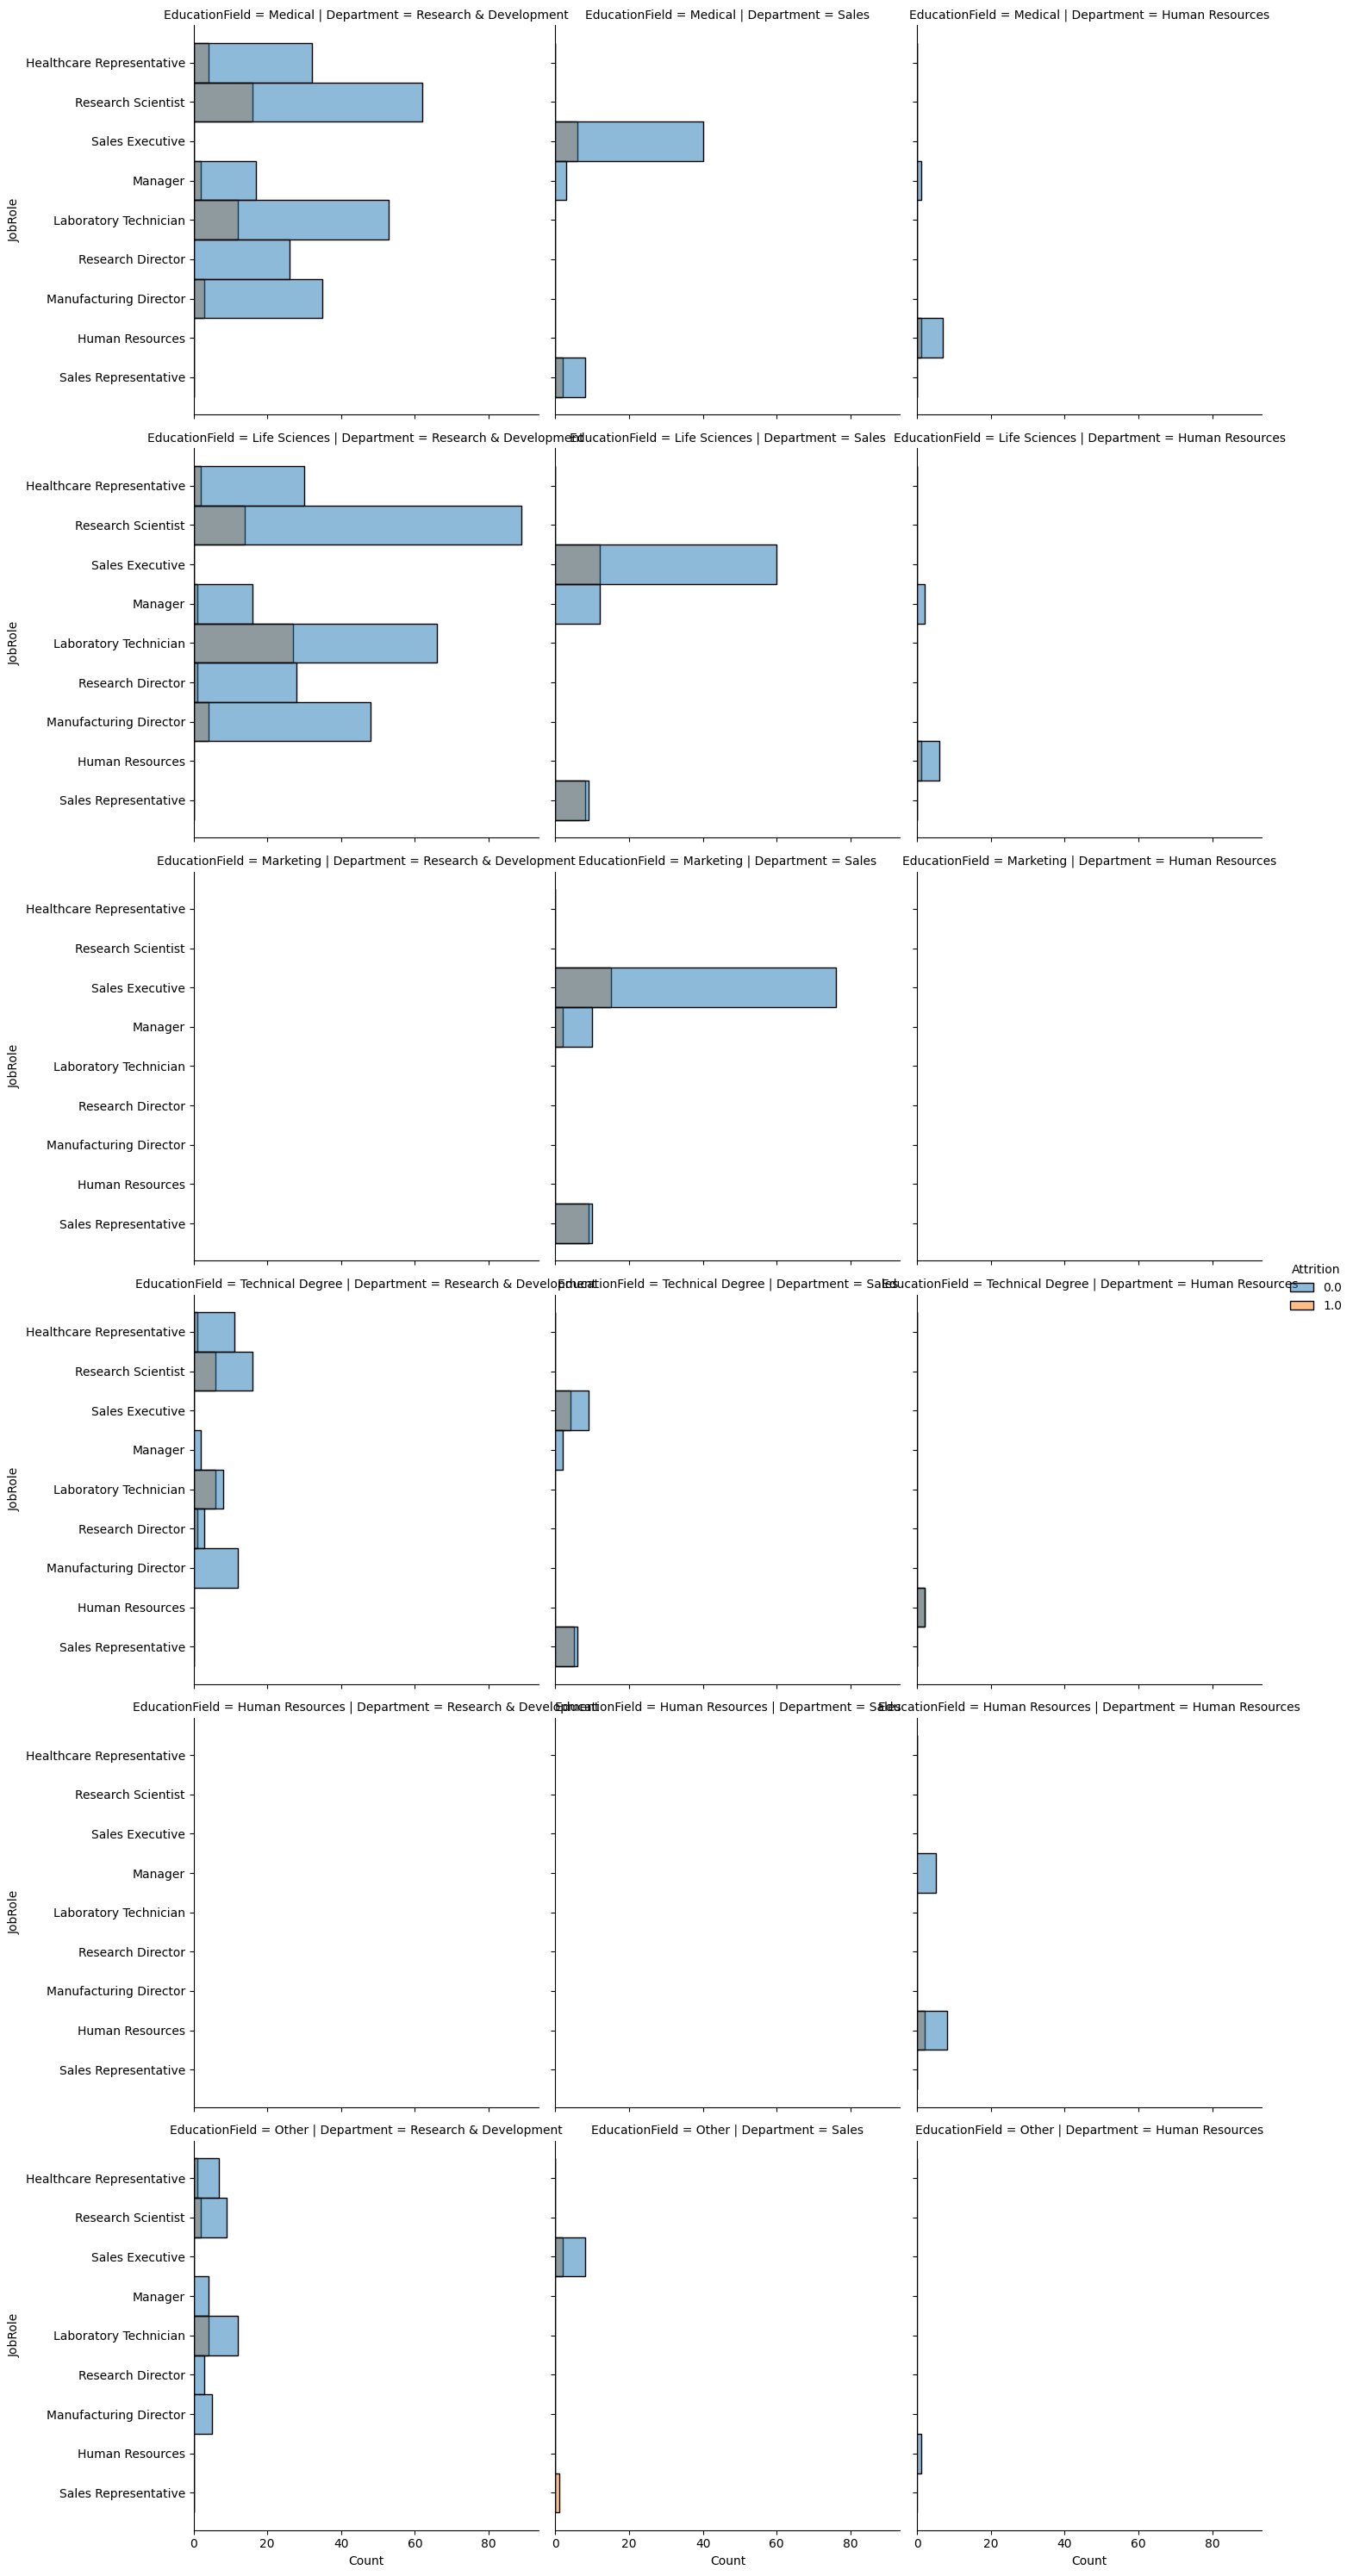

In [24]:
sns.displot(main_df, y="JobRole", hue="Attrition", col="Department", row="EducationField")

Melalui hubungan antar kategori di atas, dapat diketahui bahwa:
* Pekerjaan *Sales Representative* banyak ditempatkan di departemen *sales* jika *Education Field* adalah *Marketing, Life Sciences, Medical*
* Pekerjaan *Laboratory Technician* tidak cocok untuk ditempatkan di departemen *Research & Development*
* Departemen *Human Resources* hanya diisi *Job Role Manager* dan *Human Resources*
* Departemen *Research & Development* tidak diisi dari *Education Field Marketing, dan Human Resources*, namun banyak diisi dari *Education Field Medical dan Life Sciences*


In [25]:
num = main_df[['Attrition', 'Age', 'DistanceFromHome', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome','OverTime']]
num.head()

,Attrition,Age,DistanceFromHome,JobLevel,JobSatisfaction,MonthlyIncome,OverTime
EmployeeId,,,,,,,
2,1.0,37,11,2,2,4777,0
3,1.0,51,4,1,3,2461,1
4,0.0,42,26,4,2,13525,0
7,0.0,40,1,2,4,7457,1
8,1.0,55,2,5,1,19859,1


<Axes: >

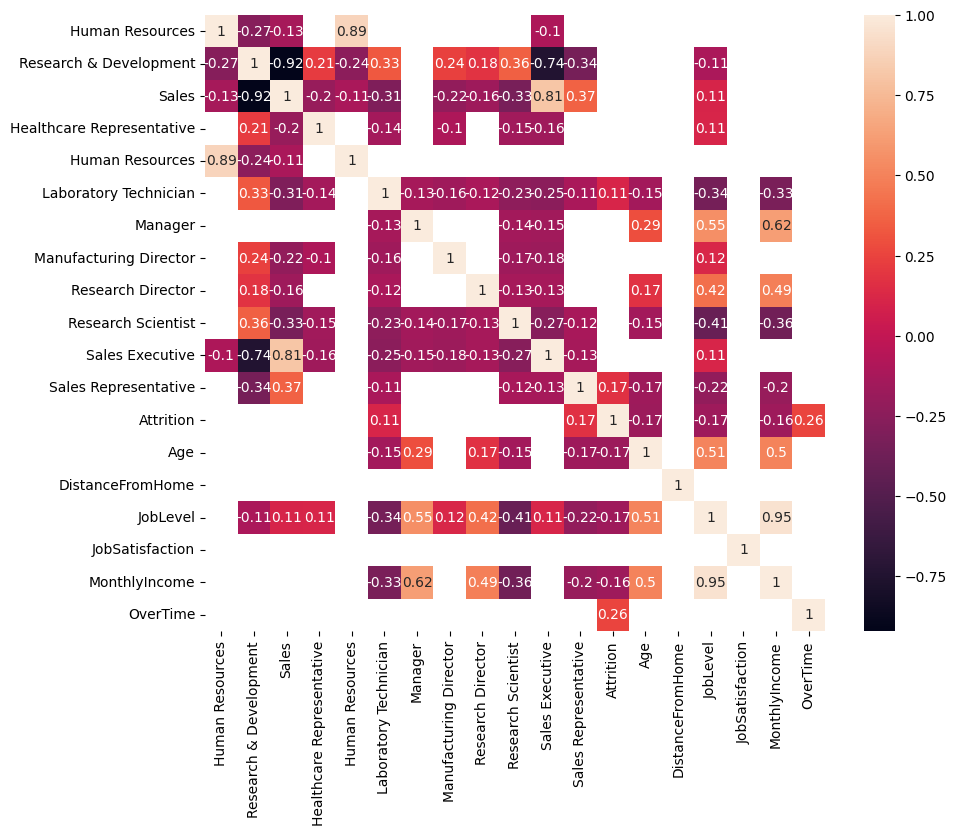

In [26]:
Department_Encoded = pd.get_dummies(main_df['Department'])
JobRole_Encoded = pd.get_dummies(main_df['JobRole'])
Encoded = pd.concat([Department_Encoded.reset_index(drop=True),
                     JobRole_Encoded.reset_index(drop=True),
                     num.reset_index(drop=True)], axis=1)
n=Encoded.corr()
plt.figure(figsize=(10,8))
sns.heatmap(n[(n>0.1) | (n<-0.1)],annot=True)

Hubungan data kategorikal dengan numerikal dari data di atas antara lain:
* *Job Level* berbanding lurus dengan *Monthly Income*. Semakin tinggi tingkat pekerjaannya, semakin tinggi gajinya
(*Manager* dan *Research Scientist* memiliki *Job Level* tinggi, sehingga mendapat *Monthly Income* yang tinggi)
(*Laboratory Technician* dan *Reseach Scientist* memiliki *Job Level* rendah, sehingga mendapat *Monthly Income* yang rendah)
* Nilai *Job Satisfaction* tidak dipengaruhi jenis pekerjaan atau departemen

## Data Preparation / Preprocessing

In [28]:
copy_df = main_df.copy()
{x: len(copy_df[x].unique()) for x in copy_df.columns}

{'Age': 43,
 'Attrition': 2,
 'BusinessTravel': 3,
 'DailyRate': 731,
 'Department': 3,
 'DistanceFromHome': 29,
 'Education': 5,
 'EducationField': 6,
 'EnvironmentSatisfaction': 4,
 'Gender': 2,
 'HourlyRate': 71,
 'JobInvolvement': 4,
 'JobLevel': 5,
 'JobRole': 9,
 'JobSatisfaction': 4,
 'MaritalStatus': 3,
 'MonthlyIncome': 991,
 'MonthlyRate': 1038,
 'NumCompaniesWorked': 10,
 'OverTime': 2,
 'PercentSalaryHike': 15,
 'PerformanceRating': 2,
 'RelationshipSatisfaction': 4,
 'StockOptionLevel': 4,
 'TotalWorkingYears': 40,
 'TrainingTimesLastYear': 7,
 'WorkLifeBalance': 4,
 'YearsAtCompany': 35,
 'YearsInCurrentRole': 19,
 'YearsSinceLastPromotion': 16,
 'YearsWithCurrManager': 18}

In [29]:
copy_df['Gender'] = copy_df['Gender'].replace({'Female': 0, 'Male': 1})
copy_df['OverTime'] = copy_df['OverTime'].replace({'No': 0, 'Yes': 1})
copy_df['BusinessTravel'] = copy_df['BusinessTravel'].replace({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2})

In [30]:
def copy_dataset(df_train):
    for column in ['Department', 'EducationField', 'JobRole', 'MaritalStatus']:
        dummies = pd.get_dummies(df_train[column], prefix=column)
        df_train = pd.concat([df_train, dummies], axis=1)
        df_train = df_train.drop(column, axis=1)

    return df_train

In [31]:
copy_df = copy_dataset(copy_df)
copy_df

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
EmployeeId,,,,,,,,,,,,,,,,,,,,,
2,37,1.0,1,1141,11,2,1,0,61,1,...,False,False,False,False,False,False,False,False,True,False
3,51,1.0,1,1323,4,4,1,1,34,3,...,False,False,False,False,True,False,False,False,True,False
4,42,0.0,2,555,26,3,3,0,77,3,...,False,False,False,False,False,True,False,False,True,False
7,40,0.0,1,1124,1,2,2,1,57,1,...,False,False,False,False,False,True,False,False,True,False
8,55,1.0,1,725,2,3,4,1,78,3,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,28,1.0,0,1366,24,2,2,1,72,2,...,False,False,False,False,False,False,False,False,False,True
1466,38,0.0,1,168,1,3,3,0,81,3,...,False,False,True,False,False,False,False,False,False,True
1468,28,1.0,1,1485,12,1,3,0,79,3,...,True,False,False,False,False,False,False,False,True,False


## Modeling

In [32]:
X = copy_df.drop('Attrition', axis=1)
y = copy_df['Attrition']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, shuffle=True, random_state=0)

In [34]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [35]:
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

## Evaluation

In [36]:
accuracy_score(y_test, pred)

0.8229043683589138

In [37]:
matrix = confusion_matrix(y_test, pred)
matrix

array([[628,  76],
       [ 74,  69]])

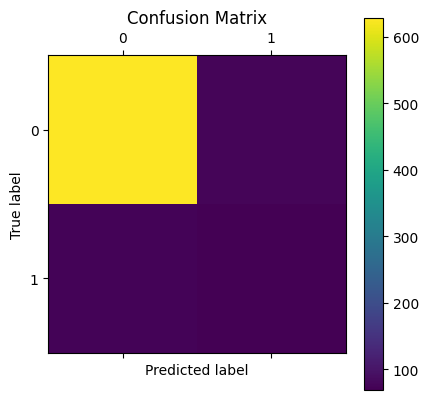

In [38]:
matrix = confusion_matrix(y_test, pred)
plt.matshow(matrix)
plt.colorbar()

plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()